<center>
    
# Spectra of Random 2d Matrices

### Juan Sebastian Sierra Jaraba - jsierraj@unal.edu.co 
### Departamento de Física, Facultad de Ciencias, Sede Bogotá
### Universidad Nacional de Colombia
    
</center>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
#Crear datos
def create_sample(seed):
    #Crear el sample de matrices
    np.random.seed(seed)
    matrices = np.random.rand(N, 2, 2)*2 - 1

    #Tomar la informacion relevante (traza y determinante)
    data = np.zeros(2*N)
    data = data.reshape(2, N)
    data[0] = np.trace(matrices, axis1 = 1, axis2 = 2)
    data[1] = np.linalg.det(matrices)
    
    return data

#funcion principal
def main(N, eps, seed = 32):
    
    data = create_sample(seed)
    
    #Clasificar los datos
    saddle = data[:,data[1,:]<-eps]
    sfp = data[:, (np.absolute(data[1,:])<eps) & (data[0,:]<-eps)]
    ufp = data[:, (np.absolute(data[1,:])<eps) & (data[0,:]>eps)]
    
    sink = data[:, (np.power(data[0,:], 2)-4*data[1,:]>eps) & (data[0,:]<-eps) & (data[1,:]>eps)]
    s_sink = data[:, (np.power(data[0,:], 2)-4*data[1,:]<-eps) & (data[0,:]<-eps) & (data[1,:]>eps)]
    d_sink = data[:, (np.absolute(np.power(data[0,:], 2)-4*data[1,:])<eps) & (data[0,:]<-eps) & (data[1,:]>eps)]
    
    source = data[:, (np.power(data[0,:], 2)-4*data[1,:]>eps) & (data[0,:]>eps) & (data[1,:]>eps)]
    s_source = data[:, (np.power(data[0,:], 2)-4*data[1,:]<-eps) & (data[0,:]>eps) & (data[1,:]>eps)]
    d_source = data[:, (np.absolute(np.power(data[0,:], 2)-4*data[1,:])<eps) & (data[0,:]>eps) & (data[1,:]>eps)]
    
    u_motion = data[:, np.power(data[0,:],2)+np.power(data[1,:],2) < eps**2]
    center = data[:, (np.absolute(data[0,:])<eps) & ((data[1,:]>eps))]
    
    names = ["Saddle", "Sink", "Spiral sink", "Source", "Spiral source", "Degenerated sink",
             "Degenerated source", "Stable fixed point", "Unstable fixed point", "Center",
             "Uniform motion"]
    
    #frecuencias
    frec = np.array([saddle.size, sink.size, s_sink.size, source.size, s_source.size, d_sink.size,
                     d_source.size, sfp.size, ufp.size, center.size, u_motion.size])*50/N
    
    labels = ["Saddle", "Sink", "S. Sink", "Source", "S. Src", "D. Sink", "D. Src", "SFP",
              "UFP", "Center", "UM"]
    
    
    #ploting
    fig = plt.figure(figsize=(19.2, 7.2))
    fig.suptitle("Spectra of random 2d Matrices")
    
    #Plano det A - Tr A
    ax1 = fig.add_subplot(1,2,1)
    
    ax1.plot(saddle[0,:],saddle[1,:], ".")

    ax1.plot(sink[0,:],sink[1,:], ".")
    ax1.plot(s_sink[0,:],s_sink[1,:], ".")
    
    ax1.plot(source[0,:],source[1,:], ".")
    ax1.plot(s_source[0,:],s_source[1,:], ".")
    
    ax1.plot(d_sink[0,:],d_sink[1,:], ".")
    ax1.plot(d_source[0,:],d_source[1,:], ".")
    
    ax1.plot(sfp[0,:],sfp[1,:], ".")
    ax1.plot(ufp[0,:],ufp[1,:], ".")
    
    ax1.plot(center[0,:],center[1,:], ".")
    ax1.plot(u_motion[0,:],u_motion[1,:], ".")
    
    ax1.set_xlabel(r"Trace $tr(A)$")
    ax1.set_ylabel(r"Determinant $det(A)$")
    ax1.legend(names)
    
    #Histograma de frecuencias
    ax2 = fig.add_subplot(1, 2, 2)
    
    ax2.bar(labels, frec, log=1)
    
    ax2.set_xlabel(r"Frecuency of linear solutions")
    ax2.set_ylabel(r"%")
    
    plt.savefig("Spectra_of_random_2D_matrices.png")
    
    return 0

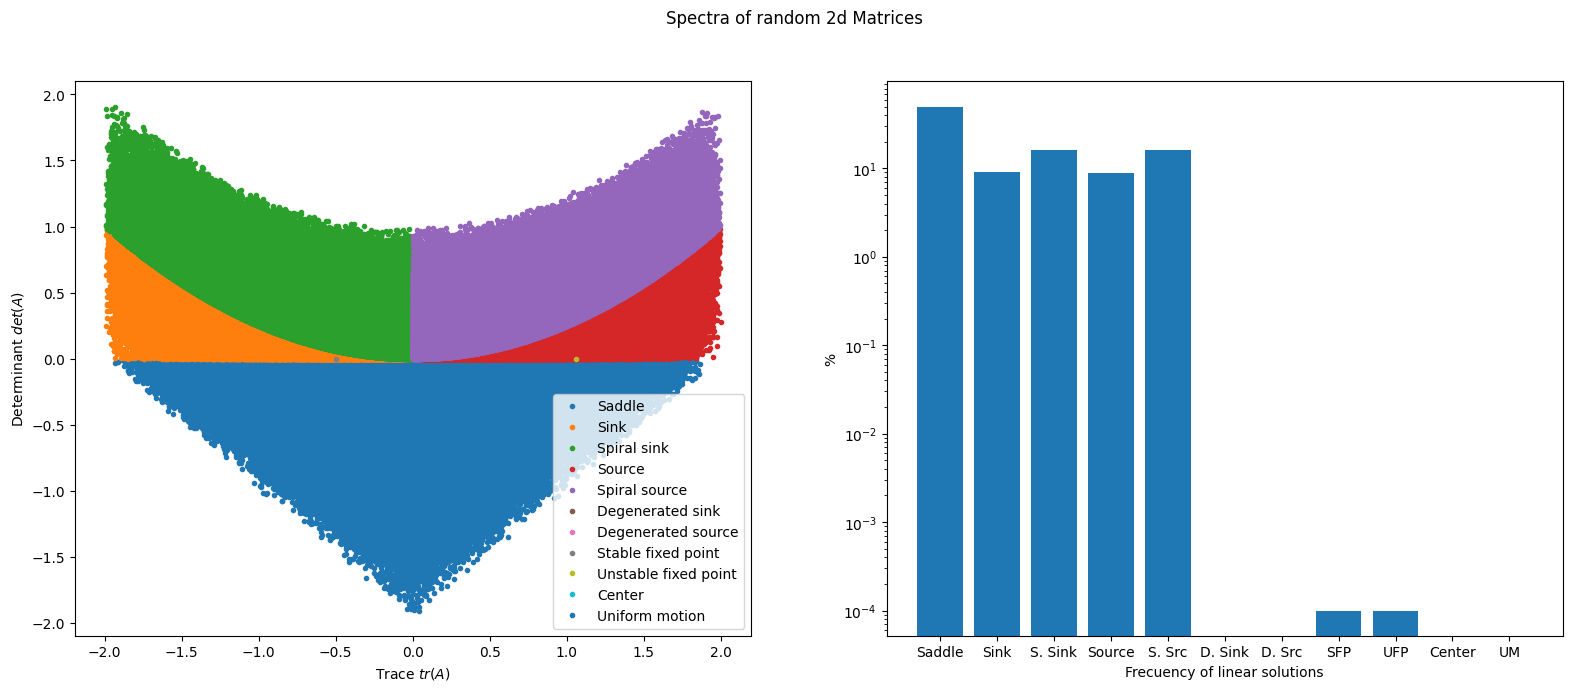

In [8]:
#Constantes 
N = 1000000
eps = 10**(-6)
                           #La primera figura se ve mejor con N = 10^7 y eps = 10^-3
#Ejecucion
if __name__=='__main__':
    main(N, eps)